<h1 style='text-align: center; color: lightblue; font-size: 40px'> Neural Nets from scratch: </h1>
<h2 style='text-align: center; color: lightblue; font-size: 30px'> Convolutions </h2>

# Convolutions

## What is a convolution ?

 => A convolution is <b>a mixing of information </b>. <br /> It helps pulling out <b>features</b> of a signal

<img src="https://e2eml.school/images/conv1d/aa_copy.gif" />

<blockquote>According to common belief, neural networks' main advantage over traditional ML algorithms is that NNs learn features by themselves while in the traditional ML, you handcraft features. This is not exactly true. Well, it's true for vanilla feed-forward NNs consisting only of fully connected layers. But those are very hard to train for high dimensional inputs like images.

When you use a convolutional neural network, you already use two types of handcrafted features: convolution filters and pooling filters.

The designer of the convolutional NN for image classification has looked into the input data (this is what traditional ML engineers do to invent features) and decided that patches of pixels close to each other contain information that could help in classification, <b> and at the same time reduce the number of NN parameters </b>.

The same reasoning is used when we classify texts using bag-of-words features. We look at the data and decide that individual words and n-grams of words would be good features to classify a document. This reduces the number of input features while allowing us to accurately classify documents.

BTW, the way convolutional filters apply (sum of element-wise multiplications, spanning over channels resulting in one number) is a hell of a feature!</blockquote>
<p style="test-align:right"> Andriy Burkov, author of "The 100 pages Machine Learning book"</p>

<b> => But how do we apply convolution to images? </b>

### Spreadsheet example

see conv-example.ods in excel_files/
see also <a href="https://medium.com/apache-mxnet/multi-channel-convolutions-explained-with-ms-excel-9bbf8eb77108"> here </a>

### visual understanding
source <a href='https://docs.gimp.org/2.6/en/plug-in-convmatrix.html'> Gimp documentation </a>

<img src="https://github.com/benjamin-du/GEMA-2021/blob/main/Lesson%202%20-%20Convolution/images/filters.png?raw=1"> 

## First: some array and tensor technicalities

In [1]:
my_list = [1, 2, 3, 4]

In [2]:
my_list[0], my_list[1:], my_list[::-1]

(1, [2, 3, 4], [4, 3, 2, 1])

In [3]:
mask = ([True, True, False, True])
#This will produce an error
my_list[mask]

TypeError: ignored

In [4]:
import numpy as np
my_array = np.array(my_list)

In [5]:
my_array[0], my_array[1:], my_array[::-1]

(1, array([2, 3, 4]), array([4, 3, 2, 1]))

In [6]:
my_array[mask]

array([1, 2, 4])

In [7]:
my_list_of_list = [
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
    [13,14,15,16],    
]

In [17]:
#This will produce an error
my_list_of_list[:, 1]

TypeError: ignored

In [18]:
my_2d_array = np.array(my_list_of_list)

In [22]:
my_2d_array[:,1]

array([ 2,  6, 10, 14])

### broadcasting

In [23]:
my_2d_array * 2

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24],
       [26, 28, 30, 32]])

In [24]:
my_2d_array[:,1] = my_2d_array[:,1] * 2
my_2d_array

array([[ 1,  4,  3,  4],
       [ 5, 12,  7,  8],
       [ 9, 20, 11, 12],
       [13, 28, 15, 16]])

In [25]:
my_vector = np.array([1,2,8,4])

my_2d_array * my_vector

array([[  1,   8,  24,  16],
       [  5,  24,  56,  32],
       [  9,  40,  88,  48],
       [ 13,  56, 120,  64]])

In [29]:
wages = np.array([2000,1400,3200,1700])

# give all your employees a 10% increase: 
new_wages = wages*1.10
print(new_wages)
print(wages)

[2200. 1540. 3520. 1870.]
[2000 1400 3200 1700]


In [31]:
# give only your first and last employee a 10% increase:
split_raise = wages.copy()
split_raise[[0,3]] = split_raise[[0,3]]*1.1
new_wages = split_raise
print(new_wages)

[2200 1400 3200 1870]


## Code a convolution

In [32]:
import torch

In [33]:
import matplotlib.pyplot as plt

### Get a filter: Edge detection

In [34]:
edge_detection_filter = torch.tensor([[-1.,-1,-1],
                                      [-1,9,-1],
                                      [-1,-1,-1]
                                     ])


In [35]:
# that's the biggest edge you'll find
test = torch.tensor([[0.,0,0],
                    [0,255,0],
                    [0,0,0]])
(test * edge_detection_filter).sum()

tensor(2295.)

In [36]:
# thought process: 
# create a tensor that, when convoluted with our kernel above, will give back 0:

### Get a picture: animal

In [53]:
animal = plt.imread('https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png')

( animal taken from <a href='https://en.wikipedia.org/wiki/Kernel_(image_processing)'> wikipedia </a> )

(100, 100, 3)


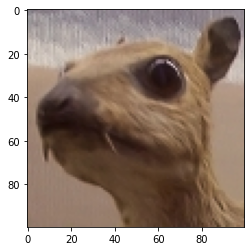

In [54]:
# it's a 100x100 pixel image, and it has 4 channels
print(animal.shape)
plt.imshow(animal);

(100, 100, 3)


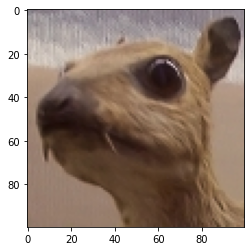

In [59]:
# Let's keep only one channel for now
animal = animal[:, :, 0:3]
plt.imshow(animal);
print(animal.shape)

### Convolution: pseudo-code 
Create pseudo-code together below

In [56]:
# your pseudo code here : 

# pseudo code:
# pour chaque ligne:
    # si première ou dernière ligne: pass
    # sinon:
        # pour chaque pixel:
            # si c'est le premier ou dernier pixel:pass
            # sinon:
                # prendre ligne au dessus de colonne -1 à colonne+1
                # prendre ligne de colonne -1 à colonne +1
                # prendre ligne en dessous de colonne -1 à colonne +1
                # multiplier ce patch par le filtre (element-wise multiplication)
                # faire la somme
                # le pixel ligne-1, colonne-1 du résultat = cette somme 
                #(ou stocker les résultats dans l'ordre et faire un reshape)

### Convolution: loop answer

'\nprint(animal_torch)\nplt.imshow(animal_torch*animal[:,:,2])\ni = 50\nj = 50\npixelsArray = [\n          [animal[i-1,j-1],animal[i-1,j],animal[i-1,j+1]],\n          [animal[i,j-1],animal[i,j],animal[i,j+1]],\n          [animal[i+1,j-1],animal[i+1,j],animal[i+1,j+1]]   \n        ]\npixelsArray = np.array(pixelsArray)\nprint(pixelsArray)\nplt.imshow(pixelsArray)\n'

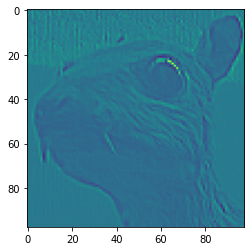

In [108]:
result_animal = torch.zeros(98,98)
animal_torch = torch.tensor(animal[:,:,2])  # keep only one channel
temp_mat = []

for row in range (1,99):
  for pixel in range (1,99):
    temp_mat = torch.tensor([[animal_torch[row - 1, pixel - 1], animal_torch[row - 1, pixel], animal_torch[row - 1, pixel + 1]],
                [animal_torch[row, pixel - 1], animal_torch[row, pixel], animal_torch[row, pixel + 1]],
                [animal_torch[row + 1, pixel - 1], animal_torch[row + 1, pixel], animal_torch[row + 1, pixel + 1]]])
    
    result_animal[row - 1, pixel - 1] = (temp_mat * edge_detection_filter).sum()
    

plt.imshow(result_animal)





'''
print(animal_torch)
plt.imshow(animal_torch*animal[:,:,2])
i = 50
j = 50
pixelsArray = [
          [animal[i-1,j-1],animal[i-1,j],animal[i-1,j+1]],
          [animal[i,j-1],animal[i,j],animal[i,j+1]],
          [animal[i+1,j-1],animal[i+1,j],animal[i+1,j+1]]   
        ]
pixelsArray = np.array(pixelsArray)
print(pixelsArray)
plt.imshow(pixelsArray)
'''




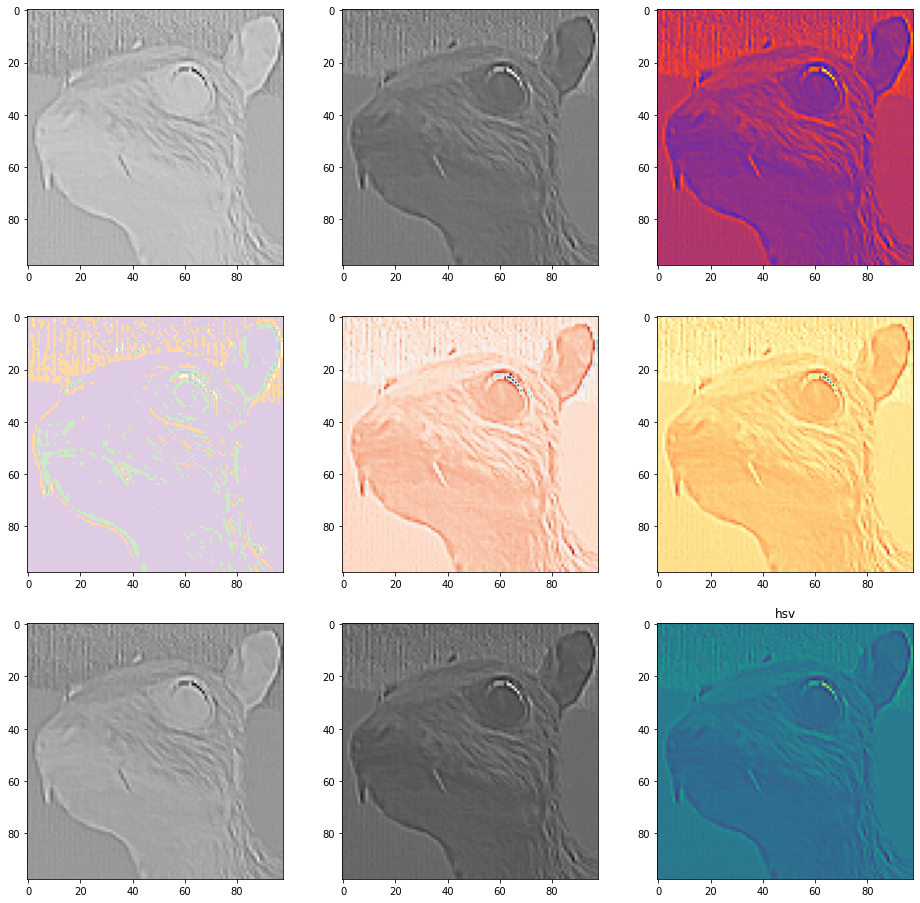

In [117]:
cmaps = ["Greys", "Greys_r", "CMRmap", "Pastel1", "RdBu", "Spectral", "binary", "gist_gray", "hsv"]
fig, ax = plt.subplots(3,3, figsize=(16,16))
for i, cmap in enumerate(cmaps):
    ax[i//3,i%3].imshow(result_animal, cmap=cmap)
    for row in range (1,99):
      for pixel in range (1,99):
        temp_mat = torch.tensor([[animal_torch[row - 1, pixel - 1], animal_torch[row - 1, pixel], animal_torch[row - 1, pixel + 1]],
                    [animal_torch[row, pixel - 1], animal_torch[row, pixel], animal_torch[row, pixel + 1]],
                    [animal_torch[row + 1, pixel - 1], animal_torch[row + 1, pixel], animal_torch[row + 1, pixel + 1]]])
        
        result_animal[row - 1, pixel - 1] = (temp_mat * edge_detection_filter).sum()
      

    plt.imshow(result_animal)
    plt.title(cmap)
fig.show()

In [118]:
result_animal

tensor([[0.7333, 0.0471, 0.8784,  ..., 0.5686, 0.6824, 0.3490],
        [0.5412, 0.6235, 1.4118,  ..., 0.4706, 0.7686, 0.4392],
        [1.0392, 0.2000, 1.3137,  ..., 0.3569, 0.6510, 0.5490],
        ...,
        [0.3294, 0.4510, 0.4824,  ..., 0.2784, 0.2314, 0.6235],
        [0.4039, 0.3961, 0.3176,  ..., 0.4196, 0.3059, 0.1137],
        [0.3569, 0.4392, 0.5412,  ..., 0.2863, 0.7294, 0.5098]])

In [119]:
result_animal.shape

torch.Size([98, 98])

In [120]:
# better code for convolution2d, using broadcasting, found on stack overflow
def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = torch.zeros((y,x))
        for i in range(y):
            for j in range(x):
                # Enter Broadcasting
                new_image[i][j] = torch.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

In [121]:
(convolution2d(animal_torch, edge_detection_filter, 0) == result_animal).all()

tensor(True)

### Interpretability ! 

<img src="https://github.com/benjamin-du/GEMA-2021/blob/main/Lesson%202%20-%20Convolution/images/layers_combine.png?raw=1" style="width: 300px; height: 300px" title="Convolutional Deep Belief Networksfor Scalable Unsupervised Learning of Hierarchical Representations">

https://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf
</img>

Zeiler & al.

<img src="https://github.com/benjamin-du/GEMA-2021/blob/main/Lesson%202%20-%20Convolution/images/Zeiler_Fergus.png?raw=1">

## Bonus: optimized way of calculating convolutions

check this <a href="https://medium.com/@_init_/an-illustrated-explanation-of-performing-2d-convolutions-using-matrix-multiplications-1e8de8cd2544"> article </a>